### **Goal: Customer Segmentation / Clustering 🧑‍🤝‍🧑**
The goal is to segment customers into distinct groups based on both their profile information and transaction behavior using clustering techniques. The result will help identify patterns in customer behavior, which can be useful for personalized marketing, targeting high-value customers, and improving customer retention.

---

### **Customer Segmentation Steps**:

1. **Data Preprocessing** 📊:
   - Merge customer and transaction data.
   - Extract key features like total spending, purchase quantity, and average product price.
   - Normalize numerical features and one-hot encode categorical ones (e.g., Region).

2. **PCA (Dimensionality Reduction)** 🔍:
   - Use PCA to reduce features to 2 components for easy visualization.

3. **Elbow Method** 📉:
   - Determine the optimal number of clusters by calculating inertia and plotting the elbow curve.

4. **K-Means Clustering** 🧑‍🏫:
   - Apply K-Means clustering with the chosen number of clusters (e.g., 4).

5. **Evaluation** 🧮:
   - Evaluate clusters using the Davies-Bouldin Index and Silhouette Score.


### Importing Libraries

In [22]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the datasets
customers = pd.read_csv('/content/drive/MyDrive/Zeotap/Customers.csv')
transactions = pd.read_csv('/content/drive/MyDrive/Zeotap/Transactions.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
df = pd.merge(transactions, customers, on='CustomerID', how='inner')

In [11]:
df

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15
...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,Jacob Holt,South America,2022-01-22
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,Mrs. Kimberly Wright,North America,2024-04-07
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,Tyler Haynes,North America,2024-09-21
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Joshua Hamilton,Asia,2024-11-11


### Feature Engineering

In [6]:
customer_features = df.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'Price': 'mean'
}).reset_index()

In [9]:
customer_features = pd.merge(customer_features, customers[['CustomerID', 'Region']], on='CustomerID', how='left')

# Region using one-hot encoding
customer_features = pd.get_dummies(customer_features, columns=['Region'], drop_first=True)

In [10]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features.drop('CustomerID', axis=1))

### PCA for Dimensionality Reduction

In [14]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

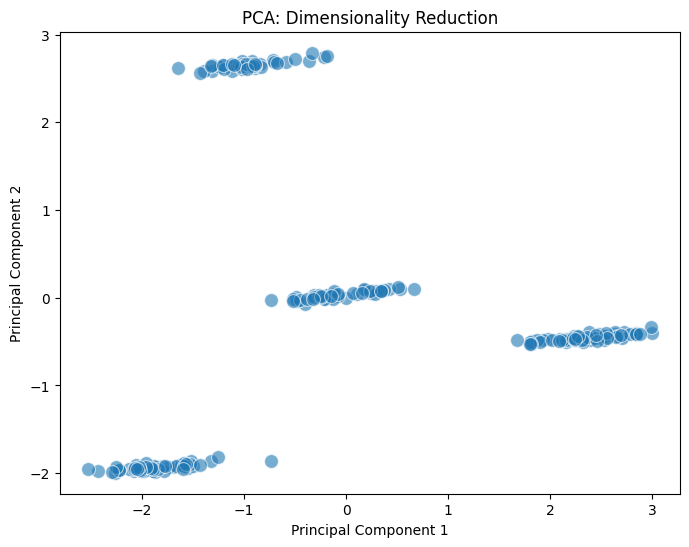

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], s=100, alpha=0.6)
plt.title('PCA: Dimensionality Reduction')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### Elbow Method to Determine the Optimal Number of Clusters

In [16]:
inertia = []
range_n_clusters = list(range(1, 11))

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)


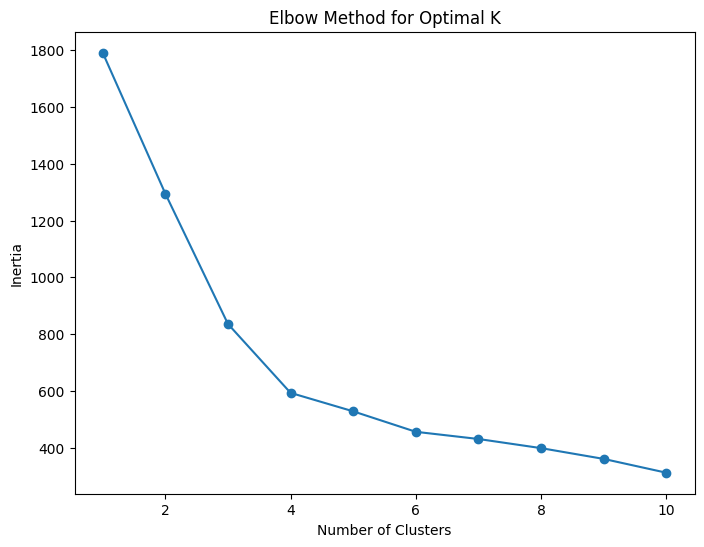

In [17]:
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

### K-Means Clustering

In [18]:
kmeans = KMeans(n_clusters=4, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(scaled_features)

pca_result = pca.fit_transform(scaled_features)

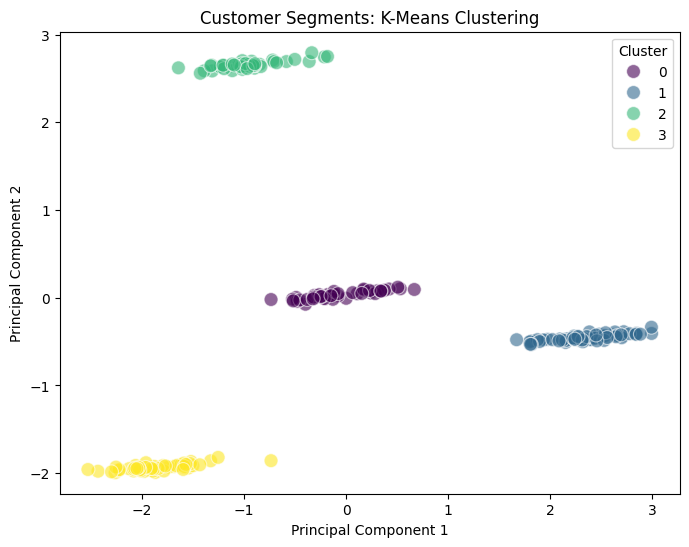

In [19]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=customer_features['Cluster'], palette='viridis', s=100, alpha=0.6)
plt.title('Customer Segments: K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### Clustering Evaluation

In [24]:
db_index = davies_bouldin_score(scaled_features, customer_features['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 0.9568549999422535
